In [713]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

import nltk
#nltk.download(all)
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\A. N. M.
[nltk_data]     JuBaer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\A. N. M.
[nltk_data]     JuBaer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [646]:
df = pd.read_csv("G:\ML\Dataset\spam.csv", encoding='latin-1')

In [647]:
df=df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [649]:
len(df)

5572

In [650]:
len(df[df.v1=='spam'])

747

In [651]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [652]:
label_encoder = preprocessing.LabelEncoder()

In [653]:
df['v1'] = label_encoder.fit_transform(df['v1'])

In [654]:
df['v1'].unique()

array([0, 1], dtype=int64)

In [655]:
df = df.rename(columns={'v1':'class', 'v2':'message'})
df.head(5)

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [656]:
df_x = df["message"]
df_y = df["class"]

In [657]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=42)

In [658]:
tfidfv = TfidfVectorizer(min_df=1, stop_words="english")

In [659]:
x_traintfidfv = tfidfv.fit_transform(x_train)

In [660]:
a=x_traintfidfv.toarray()

In [661]:
a

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26549366, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [662]:
tfidfv.inverse_transform(a[0])

[array(['boat', 'check', 'half', 'moms', 'naked', 'yo'], dtype='<U34')]

In [663]:
mnb = MultinomialNB()

In [664]:
y_train = y_train.astype('int')

In [665]:
mnb.fit(x_traintfidfv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [666]:
x_testtfidfv = tfidfv.transform(x_test)

In [667]:
predict = mnb.predict(x_testtfidfv)

In [668]:
predict

array([0, 0, 0, ..., 0, 0, 1])

In [669]:
actual = np.array(y_test)

In [670]:
actual

array([0, 0, 1, ..., 0, 0, 1])

In [671]:
count = 0

In [672]:
for i in range(len(predict)):
    if predict[i] == actual[i]:
        count = count + 1

In [673]:
count

1078

In [674]:
len(predict)

1115

In [675]:
x_test.head(5)

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
Name: message, dtype: object

In [676]:
j ="Carlos took a while (again), we leave in a minute"

In [677]:
raw = [j]

In [678]:
jtf = tfidfv.transform(raw)

In [679]:
jtf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [680]:
p = mnb.predict(jtf)

In [681]:
p

array([0])

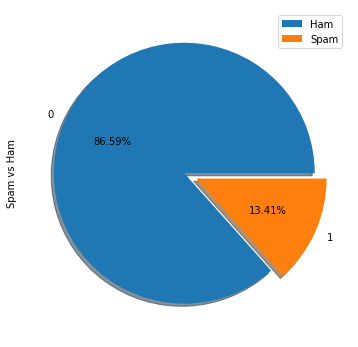

In [682]:
df["class"].value_counts().plot(kind = 'pie', explode = [0, 0.1],
                    figsize = (6, 6), autopct = '%1.2f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [683]:
spamMessages = df[df["class"] == 1]["message"]
hamMessages = df[df["class"] == 0]["message"]
spam_words = []
ham_words = []

In [687]:
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in 
             word_tokenize(hamMessages) if word.lower()
             not in stopwords.words("english") and
             word.lower().isalpha()]
    ham_words = ham_words + words
    
def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in 
             word_tokenize(spamMessages) if word.lower()
             not in stopwords.words("english") and 
             word.lower().isalpha()]
    spam_words = spam_words + words
    
    
spamMessages.apply(extractSpamWords)
hamMessages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
7       None
10      None
13      None
14      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
35      None
36      None
37      None
38      None
        ... 
5538    None
5539    None
5541    None
5542    None
5543    None
5544    None
5545    None
5546    None
5548    None
5549    None
5550    None
5551    None
5552    None
5553    None
5554    None
5555    None
5556    None
5557    None
5558    None
5559    None
5560    None
5561    None
5562    None
5563    None
5564    None
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

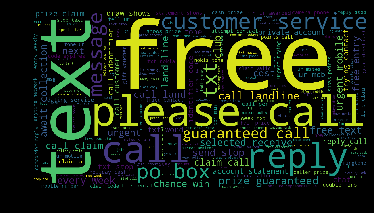

In [716]:
spam_wordcloud = WordCloud(width=1500, height=800).generate(" ".join(spam_words))
plt.figure(figsize=(5,9), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

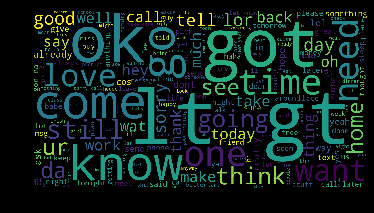

In [712]:
ham_wordcloud = WordCloud(width=1500, height=800).generate(" ".join(ham_words))
plt.figure(figsize=(5,9), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [718]:
df.describe(include='all')

,class,message
count,5572.000000,5572
unique,NaN,5169
top,NaN,"Sorry, I'll call later"
freq,NaN,30
mean,0.134063,NaN
std,0.340751,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN
